In [3]:
%pip install vtreat

     -------------------------------------- 120.7/120.7 kB 6.9 MB/s eta 0:00:00
     -------------------------------------- 108.0/108.0 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import itertools
import vtreat
import vtreat.util
import mysqlx
import mysql.connector
from sklearn.cluster import KMeans


In [5]:
# # Importing necessary libraries 

# # Connecting to SQL using my credentials 
# dbcon = mysql.connector.connect(
#     host="68.66.233.182", 
#     port=3306,
#     user="skaczmarek", 
#     password="25288236" )
# try:
#     # Reading SQL query
#     SQL_Query = pd.read_sql_query(
#         '''SELECT `oli`.`seller_id`, `oli`.`order_id`, `rv`.`review_score`,`oli`.`order_line_item`, `oli`.`freight_cost`, `oli`.`price`, `l`.`lead_type`, `mh`.`business_type`,`mh`.`lead_behavior`
#         FROM  `H_Olist`.`order_line_items` AS `oli`
#         LEFT JOIN `H_Olist`.`merchants` AS `mh` ON `oli`.`seller_id` = `mh`.`merchant_id`
#         LEFT JOIN  `H_Olist`.`reviews` AS `rv` ON `oli`.`order_id` = `rv`.`order_id`
#         LEFT JOIN  `H_Olist`.`leads` AS `l` ON `l`.`lead_id` = `mh`.`lead_id`;''', dbcon)
    
#     # Assigning 'df' to dataset and converting it to a DataFrame
#     df = pd.DataFrame(SQL_Query, columns=['seller_id','order_id','review_score','order_line_item','freight_cost','price','lead_type','business_type','lead_behavior'])
#     print(df)
#     print('The data type of df is: ', type(df))
# except:
#     print("Error: unable to convert the data")
# # Closing SQL connection dbcon.close()
# dbcon.close()

C:\Users\Sarah\Desktop\new\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


                               seller_id                             order_id  \
0       48436dade18ac8b2bce089ec2a041202     0188777fe321843a18be24a6e9aa1e53   
1       48436dade18ac8b2bce089ec2a041202     0191bbb5166d4b9a68df11797d5acfa9   
2       dd7ddc04e1b6c2c614352b383efe2d36     00018f77f2f0320c557190d7a144bdd3   
3       5b51032eddd242adc84c38acab88f23d     000229ec398224ef6ca0657da4fc703e   
4       9d7a1d34a5052409006425275ba1c2b4     00024acbcdf0a6daa1e931b038114c75   
...                                  ...                                  ...   
157361  80ceebb4ee9b31afb6c6a916a574a1e2     fefacc66af859508bf1a7934eab1e97f   
157362  4869f7a5dfa277a7dca6462dcf3b52b2     ff18b518679a92dcb00e16fae93c6d59   
157363  5a425cc503b39b262a847fd6212bf53b     ff5b7f440481674b38554434638beebf   
157364  aae3bfea055532c57fb453ed3ec80b30     ffdb12bf66b3d0145d09d962745a05f6   
157365  48436dade18ac8b2bce089ec2a041202  ﻿"00010242fe8c5a6d1ba2dd792cb16214"   

       review_score order_l

In [9]:
df["seller_id"].nunique()

3095

In [199]:
df.head()

,seller_id,order_id,review_score,order_line_item,freight_cost,price,lead_type,business_type,lead_behavior,avg_review_score
0,48436dade18ac8b2bce089ec2a041202,0188777fe321843a18be24a6e9aa1e53,5.0,1,9.94,55.90,None,None,None,NaN
1,48436dade18ac8b2bce089ec2a041202,0191bbb5166d4b9a68df11797d5acfa9,5.0,1,20.17,132.90,None,None,None,NaN
2,dd7ddc04e1b6c2c614352b383efe2d36,00018f77f2f0320c557190d7a144bdd3,4.0,1,19.93,239.90,None,None,None,NaN
3,5b51032eddd242adc84c38acab88f23d,000229ec398224ef6ca0657da4fc703e,5.0,1,17.87,199.00,None,None,None,NaN
4,9d7a1d34a5052409006425275ba1c2b4,00024acbcdf0a6daa1e931b038114c75,4.0,1,12.79,12.99,None,None,None,NaN


In [200]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157366 entries, 0 to 157365
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         157366 non-null  object 
 1   order_id          157366 non-null  object 
 2   review_score      156423 non-null  float64
 3   order_line_item   157366 non-null  int64  
 4   freight_cost      157366 non-null  float64
 5   price             157366 non-null  float64
 6   lead_type         6776 non-null    object 
 7   business_type     6776 non-null    object 
 8   lead_behavior     6776 non-null    object 
 9   avg_review_score  0 non-null       float64
dtypes: float64(4), int64(1), object(5)
memory usage: 12.0+ MB


In [285]:
df2.info()
df2['review_score'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157366 entries, 0 to 157365
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         157366 non-null  object 
 1   order_id          157366 non-null  object 
 2   review_score      156423 non-null  float64
 3   order_line_item   157366 non-null  int64  
 4   freight_cost      157366 non-null  float64
 5   price             157366 non-null  float64
 6   lead_type         6776 non-null    object 
 7   business_type     6776 non-null    object 
 8   lead_behavior     6776 non-null    object 
 9   avg_review_score  157361 non-null  float64
 10  avg_price         157366 non-null  float64
 11  num_order_ids     157366 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 14.4+ MB


3.8520550046987974

In [201]:
df2 = df.copy()

In [64]:
df2.head()
df2.isna().sum()
df2.dropna(subset=['review_score'], inplace=True)
df2.isna().sum()

seller_id                0
order_id                 0
review_score             0
order_line_item          0
freight_cost             0
price                    0
lead_type           149676
business_type       149676
lead_behavior       149676
avg_review_score    156423
dtype: int64

In [65]:
# Column cleaning 
df2['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')
df2['order_line_item'] = pd.to_numeric(df['order_line_item'], errors='coerce')
df2['freight_cost'] = pd.to_numeric(df['freight_cost'], errors='coerce')
df2['price'] = pd.to_numeric(df['price'], errors='coerce')


In [66]:
df2.groupby('seller_id')['order_id'].size()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532      3
001cca7ae9ae17fb1caed9dfb1094831    341
001e6ad469a905060d959994f1b41e4f      1
002100f778ceb8431b7a1020ff7ab48f     66
003554e2dce176b5555353e4f3555ac8      1
                                   ... 
ffcfefa19b08742c5d315f2791395ee5      1
ffdd9f82b9a447f6f8d4b91554cc7dd3     24
ffeee66ac5d5a62fe688b9d26f83f534     14
fffd5413c0700ac820c7069d66d98c89     67
ffff564a4f9085cd26170f4732393726     20
Name: order_id, Length: 3090, dtype: int64

In [226]:
# feture engineering for number of order per seller
df2['num_order_ids'] = df2.groupby('seller_id')['order_id'].transform('size')
df2[['seller_id','num_order_ids']].sort_values('seller_id')


,seller_id,num_order_ids
97855,0015a82c2db000af6aaaf3ae2ecb0532,3
78645,0015a82c2db000af6aaaf3ae2ecb0532,3
128447,0015a82c2db000af6aaaf3ae2ecb0532,3
79879,001cca7ae9ae17fb1caed9dfb1094831,344
135999,001cca7ae9ae17fb1caed9dfb1094831,344
...,...,...
85076,ffff564a4f9085cd26170f4732393726,20
14816,ffff564a4f9085cd26170f4732393726,20
58673,ffff564a4f9085cd26170f4732393726,20
128268,ffff564a4f9085cd26170f4732393726,20


In [227]:
# avg review score per seller id
df2['avg_review_score'] = df2.groupby('seller_id')['review_score'].transform('mean')
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157366 entries, 0 to 157365
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         157366 non-null  object 
 1   order_id          157366 non-null  object 
 2   review_score      156423 non-null  float64
 3   order_line_item   157366 non-null  int64  
 4   freight_cost      157366 non-null  float64
 5   price             157366 non-null  float64
 6   lead_type         6776 non-null    object 
 7   business_type     6776 non-null    object 
 8   lead_behavior     6776 non-null    object 
 9   avg_review_score  157361 non-null  float64
 10  avg_price         157366 non-null  float64
 11  num_order_ids     157366 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 14.4+ MB


In [228]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157366 entries, 0 to 157365
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         157366 non-null  object 
 1   order_id          157366 non-null  object 
 2   review_score      156423 non-null  float64
 3   order_line_item   157366 non-null  int64  
 4   freight_cost      157366 non-null  float64
 5   price             157366 non-null  float64
 6   lead_type         6776 non-null    object 
 7   business_type     6776 non-null    object 
 8   lead_behavior     6776 non-null    object 
 9   avg_review_score  157361 non-null  float64
 10  avg_price         157366 non-null  float64
 11  num_order_ids     157366 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 14.4+ MB


In [202]:
# df2.to_csv('model_data_raw.csv', index=True)

In [222]:
# avg price per seller id
df2['avg_price'] = df2.groupby('seller_id')['price'].transform('mean')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157366 entries, 0 to 157365
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         157366 non-null  object 
 1   order_id          157366 non-null  object 
 2   review_score      156423 non-null  float64
 3   order_line_item   157366 non-null  int64  
 4   freight_cost      157366 non-null  float64
 5   price             157366 non-null  float64
 6   lead_type         6776 non-null    object 
 7   business_type     6776 non-null    object 
 8   lead_behavior     6776 non-null    object 
 9   avg_review_score  0 non-null       float64
 10  avg_price         157366 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 13.2+ MB


In [229]:
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157366 entries, 0 to 157365
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   seller_id         157366 non-null  object 
 1   order_id          157366 non-null  object 
 2   review_score      156423 non-null  float64
 3   order_line_item   157366 non-null  int64  
 4   freight_cost      157366 non-null  float64
 5   price             157366 non-null  float64
 6   lead_type         6776 non-null    object 
 7   business_type     6776 non-null    object 
 8   lead_behavior     6776 non-null    object 
 9   avg_review_score  157361 non-null  float64
 10  avg_price         157366 non-null  float64
 11  num_order_ids     157366 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 14.4+ MB


In [230]:
#unique seller id
df3 = df2.drop_duplicates(subset = ['seller_id'])

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 157361
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seller_id         3095 non-null   object 
 1   order_id          3095 non-null   object 
 2   review_score      3078 non-null   float64
 3   order_line_item   3095 non-null   int64  
 4   freight_cost      3095 non-null   float64
 5   price             3095 non-null   float64
 6   lead_type         380 non-null    object 
 7   business_type     380 non-null    object 
 8   lead_behavior     380 non-null    object 
 9   avg_review_score  3090 non-null   float64
 10  avg_price         3095 non-null   float64
 11  num_order_ids     3095 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 314.3+ KB


In [236]:
df3.describe()

,review_score,order_line_item,freight_cost,price,avg_review_score,avg_price,num_order_ids
count,3078.000000,3095.000000,3095.000000,3095.000000,3090.000000,3095.000000,3095.000000
mean,4.004224,1.019709,23.561383,176.096288,3.916150,173.791060,50.845234
std,1.446134,0.193459,23.620700,361.408736,1.023885,321.736039,176.950313
min,1.000000,1.000000,0.000000,3.490000,1.000000,3.500000,1.000000
25%,3.000000,1.000000,13.770000,41.900000,3.555556,50.370904,3.000000
50%,5.000000,1.000000,17.330000,89.000000,4.134875,93.342836,9.000000
75%,5.000000,1.000000,23.380000,168.300000,4.642857,171.463750,35.000000
max,5.000000,7.000000,375.280000,6735.000000,5.000000,6729.000000,3872.000000


In [237]:
inputs = df3[['review_score','order_line_item','avg_review_score', 'num_order_ids','avg_price']]


In [238]:
inputs.dropna(inplace=True)
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 0 to 157028
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_score      3078 non-null   float64
 1   order_line_item   3078 non-null   int64  
 2   avg_review_score  3078 non-null   float64
 3   num_order_ids     3078 non-null   int64  
 4   avg_price         3078 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 144.3 KB


C:\Users\Sarah\AppData\Local\Temp\ipykernel_28920\2255151926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs.dropna(inplace=True)


In [239]:
# Create a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to your data
kmeans.fit(inputs)

# Get the cluster labels for each row in your data
labels = kmeans.predict(inputs)

# Add the cluster labels as a new column to your data
inputs['Cluster'] = labels

inputs.head()

C:\Users\Sarah\AppData\Local\Temp\ipykernel_28920\3485744554.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Cluster'] = labels


,review_score,order_line_item,avg_review_score,num_order_ids,avg_price,Cluster
0,5.0,1,4.072222,181,79.976298,0
2,4.0,1,3.611111,199,60.248090,0
3,5.0,1,2.875000,24,279.166667,0
4,4.0,1,2.571429,28,76.200714,0
5,5.0,1,3.806452,31,122.199355,0


In [242]:
df3.columns

Index(['seller_id', 'order_id', 'review_score', 'order_line_item',
       'freight_cost', 'price', 'lead_type', 'business_type', 'lead_behavior',
       'avg_review_score', 'avg_price', 'num_order_ids'],
      dtype='object')

In [243]:
# join back with id
data[['seller_id', 'lead_type', 'business_type', 'lead_behavior',
       'avg_review_score',
      'avg_price', 'num_order_ids']] = df3[['seller_id', 'lead_type',
                                            'business_type', 'lead_behavior','avg_review_score',
                                            'avg_price', 'num_order_ids']]

data['Cluster'] = inputs['Cluster']
data.head()

C:\Users\Sarah\AppData\Local\Temp\ipykernel_28920\1625611073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['seller_id', 'lead_type', 'business_type', 'lead_behavior',
C:\Users\Sarah\AppData\Local\Temp\ipykernel_28920\1625611073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['seller_id', 'lead_type', 'business_type', 'lead_behavior',
C:\Users\Sarah\AppData\Local\Temp\ipykernel_28920\1625611073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,seller_id,order_line_item,avg_review_score,num_order_ids,Cluster,lead_type,business_type,lead_behavior,avg_price
0,48436dade18ac8b2bce089ec2a041202,1,4.072222,181.0,0.0,None,None,None,79.976298
2,dd7ddc04e1b6c2c614352b383efe2d36,1,3.611111,199.0,0.0,None,None,None,60.248090
3,5b51032eddd242adc84c38acab88f23d,1,2.875000,24.0,0.0,None,None,None,279.166667
4,9d7a1d34a5052409006425275ba1c2b4,1,2.571429,28.0,0.0,None,None,None,76.200714
5,df560393f3a51e74553ab94004ba5c87,1,3.806452,31.0,0.0,None,None,None,122.199355


In [270]:
# Connecting to SQL using my credentials 
dbcon = mysql.connector.connect(
    host="68.66.233.182", 
    port=3306,
    user="skaczmarek", 
    password="25288236" )
try:
    # Reading SQL query
    SQL_Query = pd.read_sql_query(
        '''SELECT `merchant_id`, `business_segment`
        FROM  `H_Olist`.`merchants`;''', dbcon)
    
    # Assigning 'df' to dataset and converting it to a DataFrame
    bs = pd.DataFrame(SQL_Query, columns=['merchant_id','business_segment'])
    print(bs)
    print('The data type of df is: ', type(bs))
except:
    print("Error: unable to convert the data")
# Closing SQL connection dbcon.close()
dbcon.close()

                          merchant_id                 business_segment
0    00065220becb8785e2cf78355eb9bf68                      handcrafted
1    01266d4c46afa519678d16a8b683d325  construction_tools_house_garden
2    013d100f608a64ec8275c038aedeb064                  food_supplement
3    01fd077212124329bac32490e8ef80d9              household_utilities
4    0255dc67cb6bad298606136951ab1877                        computers
..                                ...                              ...
837  fe53fc6949a462475c07fcb57ead57ce                       home_decor
838  fe87f472055fbcf1d7e691c00b1560dc                       home_decor
839  ffa6adafb71b807dc13159e26431354c                  car_accessories
840  ffad1e7127fb622cb64a900751590acd                       home_decor
841  ffc470761de7d0232558ba5e786e57b7  construction_tools_house_garden

[842 rows x 2 columns]
The data type of df is:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Connecting to SQL using my credentials 
dbcon = mysql.connector.connect(
    host="68.66.233.182", 
    port=3306,
    user="skaczmarek", 
    password="25288236" )
try:
    # Reading SQL query
    SQL_Query = pd.read_sql_query(
        '''SELECT `ld`.`lead_id`,`merchant_id`, `business_segment`
        FROM  `H_Olist`.`merchants`;''', dbcon)
    
    # Assigning 'df' to dataset and converting it to a DataFrame
    bs = pd.DataFrame(SQL_Query, columns=['merchant_id','business_segment'])
    print(bs)
    print('The data type of df is: ', type(bs))
except:
    print("Error: unable to convert the data")
# Closing SQL connection dbcon.close()
dbcon.close()

In [272]:
merged_df = pd.merge(data, bs, left_on='seller_id', right_on='merchant_id', how='left')

In [277]:
# Connecting to SQL using my credentials 
dbcon = mysql.connector.connect(
    host="68.66.233.182", 
    port=3306,
    user="skaczmarek", 
    password="25288236" )
try:
    # Reading SQL query
    SQL_Query = pd.read_sql_query(
        '''SELECT DISTINCT `lead`, `origin`, `seller`		
FROM (SELECT `ld`.`lead_id` AS `lead`, `mh`.`lead_id`, `ld`.`origin` AS `origin`, `mh`.`merchant_id` AS `seller`,`oli`.`seller_id`
FROM `H_Olist`.`leads` AS `ld`
INNER JOIN `H_Olist`.`merchants` as `mh` ON `mh`.`lead_id` =  `ld`.`lead_id`
INNER JOIN `H_Olist`.`order_line_items` AS `oli` ON `oli`.`seller_id` = `mh`.`merchant_id`) as `sub`''', dbcon)
    
    # Assigning 'df' to dataset and converting it to a DataFrame
    s = pd.DataFrame(SQL_Query, columns=['lead','origin','seller'])
    print(s)
    print('The data type of df is: ', type(s))
except:
    print("Error: unable to convert the data")
# Closing SQL connection dbcon.close()
dbcon.close()

C:\Users\Sarah\Desktop\new\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


                                 lead          origin  \
0    cfccca319397a5ea2bb11bd90b0d925d     paid_search   
1    115f08592f4c2bb29013efbbc46608fc         unknown   
2    31aa9651503a33c7f28f2a6e4d46b6e0         unknown   
3    fc4166d1b1e192f650ee2d807b54c943          social   
4    e0bcbf50b9afa71ee130b94dfe8bcf2e     paid_search   
..                                ...             ...   
375  6c6094f256f51e83fe02bce6091163e7  organic_search   
376  e428d5580f729d23e6070e43c492e424         unknown   
377  512182619d12ae0863827b7e5ab97f19  organic_search   
378  f2258c61a8b46c0620005f5949fb11b8           email   
379  17c77fd570aa86b74387fae66d9d4edd         unknown   

                               seller  
0    ba143b05f0110f0dc71ad71b4466ce92  
1    ffc470761de7d0232558ba5e786e57b7  
2    d3dcf0604eabf0224fbd5948b5e02f69  
3    70c27847eca8195c983ed7e798c56743  
4    516e7738bd8f735ac19a010ee5450d8d  
..                                ...  
375  da4d149c0ddbac90557103ac0a0ec3

In [278]:
merged_dff = pd.merge(data, s, left_on='seller_id', right_on='seller', how='left')

In [279]:
data.nunique()

seller_id           3078
order_line_item        5
avg_review_score    1009
num_order_ids        313
Cluster                4
lead_type              8
business_type          3
lead_behavior          7
avg_price           2683
dtype: int64

In [246]:
data['Cluster'].unique()

array([ 0.,  2.,  3.,  1., nan])

## Plotting the Cluster

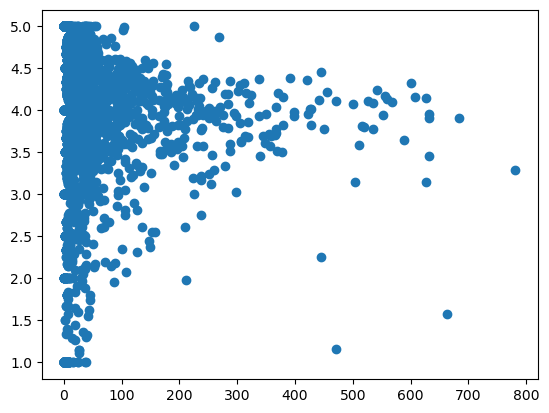

In [247]:
# Filter for rows with cluster label 0
filtered_label0 = data[data['Cluster'] == 0] 

# Convert the DataFrame to a NumPy array
filtered_label0_array = filtered_label0.to_numpy()

# Plot the first and second columns of the array as x and y coordinates
plt.scatter(filtered_label0_array[:,3], filtered_label0_array[:,2])
plt.show()

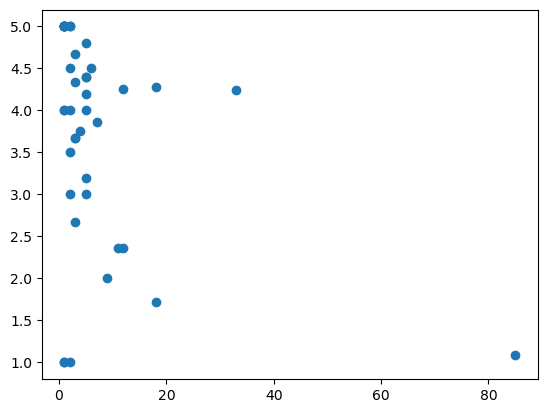

In [248]:
# Filter for rows with cluster label 1
filtered_label1 = data[data['Cluster'] == 1] 

# Convert the DataFrame to a NumPy array
filtered_label1_array = filtered_label1.to_numpy()

# Plot the first and second columns of the array as x and y coordinates
plt.scatter(filtered_label1_array[:,3], filtered_label1_array[:,2])
plt.show()

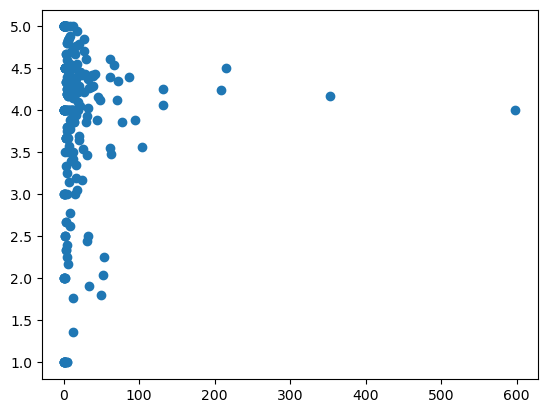

In [249]:
# Filter for rows with cluster label 2
filtered_label2 = data[data['Cluster'] == 2] 

# Convert the DataFrame to a NumPy array
filtered_label2_array = filtered_label2.to_numpy()

# Plot the first and second columns of the array as x and y coordinates
plt.scatter(filtered_label2_array[:,3], filtered_label2_array[:,2])
plt.show()

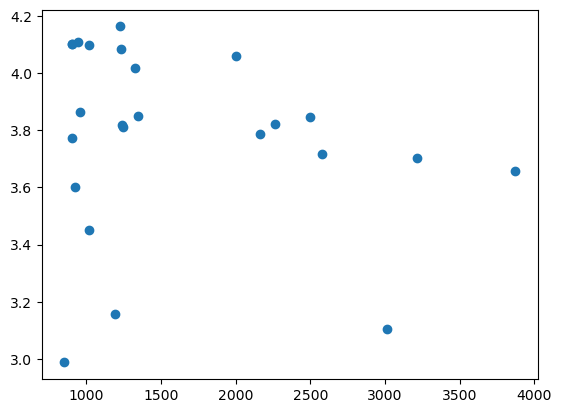

In [250]:
# Filter for rows with cluster label 3
filtered_label3 = data[data['Cluster'] == 3] 

# Convert the DataFrame to a NumPy array
filtered_label3_array = filtered_label3.to_numpy()

# Plot the first and second columns of the array as x and y coordinates
plt.scatter(filtered_label3_array[:,3], filtered_label3_array[:,2])
plt.show()

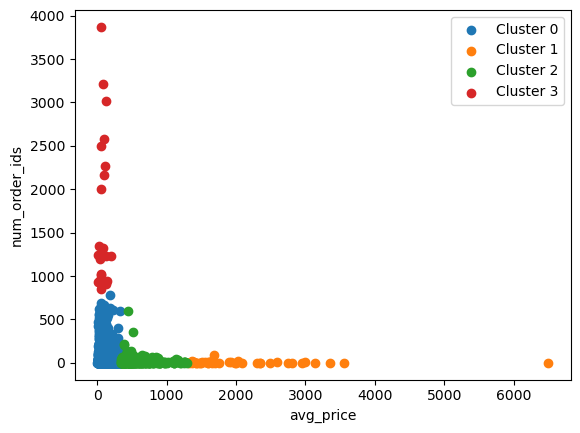

In [258]:

# Create a single plot
fig, ax = plt.subplots()

# Plot each cluster's data as a separate scatter plot on the same axes
ax.scatter(filtered_label0['avg_price'], filtered_label0['num_order_ids'], label='Cluster 0')
ax.scatter(filtered_label1['avg_price'], filtered_label1['num_order_ids'], label='Cluster 1')
ax.scatter(filtered_label2['avg_price'], filtered_label2['num_order_ids'], label='Cluster 2')
ax.scatter(filtered_label3['avg_price'], filtered_label3['num_order_ids'], label='Cluster 3')

# Add axis labels and a legend
ax.set_xlabel('avg_price')
ax.set_ylabel('num_order_ids')
ax.legend()

# Display the plot
plt.show()


In [205]:
#data[['seller_id','Cluster']].to_csv('ids_and_clusters.csv', index =True)

## Info on each cluster

In [280]:
merged_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seller_id         3078 non-null   object 
 1   order_line_item   3090 non-null   int64  
 2   avg_review_score  3078 non-null   float64
 3   num_order_ids     3078 non-null   float64
 4   Cluster           3078 non-null   float64
 5   lead_type         379 non-null    object 
 6   business_type     379 non-null    object 
 7   lead_behavior     379 non-null    object 
 8   avg_price         3078 non-null   float64
 9   lead              379 non-null    object 
 10  origin            379 non-null    object 
 11  seller            379 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 313.8+ KB


In [274]:
print(merged_df.groupby(['business_segment','Cluster']).size().unstack(fill_value=0))

Cluster                          0.0  1.0  2.0
business_segment                              
air_conditioning                   1    1    0
audio_video_electronics           25    0    6
baby                               5    0    1
bags_backpacks                    14    0    0
bed_bath_table                    10    0    0
books                              4    0    0
car_accessories                   25    2    3
computers                         12    0    0
construction_tools_house_garden   26    2    4
fashion_accessories                6    0    0
food_drink                         9    0    0
food_supplement                    7    0    1
games_consoles                     1    0    0
gifts                              2    0    1
handcrafted                        3    0    0
health_beauty                     43    0    2
home_appliances                    4    0    1
home_decor                        40    0    3
home_office_furniture              3    0    0
household_uti

In [260]:
print(data.groupby(['business_type','Cluster']).size().unstack(fill_value=0))

Cluster        0.0  2.0  1.0
business_type               
                 2    1    0
manufacturer    81    8    0
reseller       259   22    6


In [266]:
print(data.groupby(['lead_type','Cluster']).size().unstack(fill_value=0))

Cluster          0.0  2.0  1.0
lead_type                     
                   2    1    0
industry          40    1    0
offline           26    2    2
online_beginner   20    0    1
online_big        64   13    1
online_medium    157   13    2
online_small      28    0    0
online_top         5    1    0


In [263]:
data['Cluster'].unique()

array([ 0.,  2.,  3.,  1., nan])

In [282]:
merged_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seller_id         3078 non-null   object 
 1   order_line_item   3090 non-null   int64  
 2   avg_review_score  3078 non-null   float64
 3   num_order_ids     3078 non-null   float64
 4   Cluster           3078 non-null   float64
 5   lead_type         379 non-null    object 
 6   business_type     379 non-null    object 
 7   lead_behavior     379 non-null    object 
 8   avg_price         3078 non-null   float64
 9   lead              379 non-null    object 
 10  origin            379 non-null    object 
 11  seller            379 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 313.8+ KB


In [281]:
print(merged_dff.groupby(['origin','Cluster']).size().unstack(fill_value=0))

Cluster         0.0  2.0  1.0
origin                       
                  4    0    0
direct_traffic   28    3    0
display           2    0    0
email             4    1    1
organic_search  100    9    3
other             2    0    0
paid_search      90    9    2
referral          7    2    0
social           29    2    0
unknown          76    5    0


In [253]:
filtered_label0.describe()

,order_line_item,avg_review_score,num_order_ids,Cluster,avg_price
count,2750.000000,2750.000000,2750.000000,2750.0,2750.000000
mean,1.021818,3.919301,41.189818,0.0,103.139053
std,0.204257,1.022419,83.941289,0.0,72.859685
min,1.000000,1.000000,1.000000,0.0,3.500000
25%,1.000000,3.555556,3.000000,0.0,47.431289
50%,1.000000,4.138689,10.000000,0.0,84.679399
75%,1.000000,4.657143,37.000000,0.0,139.541000
max,7.000000,5.000000,781.000000,0.0,343.180000


In [254]:
filtered_label1.describe()

,order_line_item,avg_review_score,num_order_ids,Cluster,avg_price
count,43.0,43.000000,43.000000,43.0,43.000000
mean,1.0,3.777232,6.790698,1.0,2061.173570
std,0.0,1.254333,13.654858,0.0,918.661983
min,1.0,1.000000,1.000000,1.0,1322.640000
25%,1.0,3.100000,1.000000,1.0,1497.305909
50%,1.0,4.200000,3.000000,1.0,1681.588235
75%,1.0,4.900000,5.000000,1.0,2344.040000
max,1.0,5.000000,85.000000,1.0,6499.000000


In [255]:
filtered_label2.describe()

,order_line_item,avg_review_score,num_order_ids,Cluster,avg_price
count,261.0,261.000000,261.000000,261.0,261.000000
mean,1.0,3.945515,18.302682,2.0,584.102308
std,0.0,1.016793,49.373891,0.0,225.221593
min,1.0,1.000000,1.000000,2.0,343.000000
25%,1.0,3.666667,2.000000,2.0,402.580645
50%,1.0,4.200000,5.000000,2.0,511.444444
75%,1.0,4.600000,16.000000,2.0,699.420000
max,1.0,5.000000,598.000000,2.0,1299.000000


In [257]:
filtered_label3.describe()

,order_line_item,avg_review_score,num_order_ids,Cluster,avg_price
count,24.0,24.000000,24.000000,24.0,24.000000
mean,1.0,3.778868,1618.375000,3.0,77.300471
std,0.0,0.326961,865.971373,0.0,42.976622
min,1.0,2.987044,853.000000,3.0,15.335092
25%,1.0,3.692360,952.750000,3.0,54.072279
50%,1.0,3.820402,1235.500000,3.0,64.189739
75%,1.0,4.067768,2186.500000,3.0,101.622594
max,1.0,4.164069,3872.000000,3.0,196.855528


In [189]:
two.head()

,review_score,order_line_item,freight_cost,price,avg_review_score,num_order_ids,Cluster,seller_id,order_id
14,5.0,1,8.88,59.99,4.061716,1993,2,cc419e0650a3c5ba77189a1882b7556a,00061f2a7bc09da83e415a52dc8a4af1
23,5.0,1,23.32,74.00,3.718872,2554,2,4a3ca9315b744ce9f8e9374361493884,0006ec9db01a64e59a68b2c340bf65a7
59,5.0,1,13.37,49.90,3.656315,3864,2,1f50f920176fa81dab994f9023523100,0008288aa423d2a3f00fcb17cd7d8719
107,3.0,1,11.85,21.99,3.849776,1338,2,ea8482cd71df3c1969d7b9473ff13abc,000e906b789b55f64edcb1f84030f90d
116,4.0,1,44.40,119.99,3.103862,3004,2,7c67e1448b00f6e969d365cea6b010ab,000f25f4d72195062c040b12dce9a18a


In [190]:
filtered_label3

,seller_id,order_line_item,avg_review_score,num_order_ids,Cluster
14,cc419e0650a3c5ba77189a1882b7556a,1,4.061716,1993,3
23,4a3ca9315b744ce9f8e9374361493884,1,3.718872,2554,3
59,1f50f920176fa81dab994f9023523100,1,3.656315,3864,3
107,ea8482cd71df3c1969d7b9473ff13abc,1,3.849776,1338,3
116,7c67e1448b00f6e969d365cea6b010ab,1,3.103862,3004,3
134,6560211a19b47992c3666cc44a7e94c0,1,3.847239,2481,3
172,8b321bb669392f5163d04c59e235e066,1,3.818917,1237,3
190,7a67c85e85bb2ce8582c35f2203ad736,1,4.164069,1219,3
260,955fee9216a65b617aa5c0531780ce60,1,3.786412,2149,3
261,620c87c171fb2a6dd6e8bb4dec959fc6,1,4.108719,929,3


In [211]:
data.describe()

,order_line_item,avg_review_score,num_order_ids,Cluster
count,3090.000000,3090.000000,3090.00000,3090.000000
mean,1.019417,3.916150,50.62233,0.167314
std,0.192809,1.023885,176.19852,0.563971
min,1.000000,1.000000,1.00000,0.000000
25%,1.000000,3.555556,3.00000,0.000000
50%,1.000000,4.134875,9.00000,0.000000
75%,1.000000,4.642857,35.00000,0.000000
max,7.000000,5.000000,3864.00000,3.000000
